# Chapter 8: Wavelet Transforms and Multiresolution Image Analysis
This is the companion file for Chapter 8.

## Video 8.1
**A useful explanation of vector spaces**

[![A useful explanation of the video](https://img.youtube.com/vi/tMV61BZCrhk/0.jpg)](https://www.youtube.com/watch?v=tMV61BZCrhk)


## Video 8.2
**A nice introduction to wavelets**

[![A useful explanation of the video](https://img.youtube.com/vi/ZnmvUCtUAEE/0.jpg)](https://www.youtube.com/watch?v=ZnmvUCtUAEE)


## Video 8.3
**Basic concepts of wavelet transforms**

[![Basic Concepts of Wavelet Transforms](https://img.youtube.com/vi/QX1-xGVFqmw/0.jpg)](https://www.youtube.com/watch?v=QX1-xGVFqmw&t=16s)


## Video 8.4
**Discrete Wavelet Transform**

[![Discrete Wavelet Transform](https://img.youtube.com/vi/F7Lg-nFYooU/0.jpg)](https://www.youtube.com/watch?v=F7Lg-nFYooU)


## **Programming exercise 8.1:**

1.   Run the following code to see the output of applying Haar Wavelet Transform.

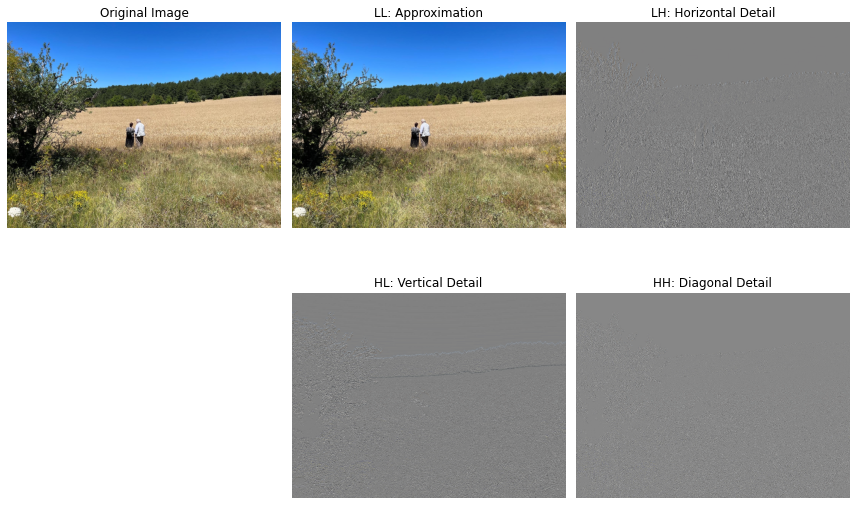

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from PIL import Image

# Load the image
url = "https://raw.githubusercontent.com/itironal/466Companion/main/images/fatos_hocam_background.png"
original_img = np.array(Image.open(urllib.request.urlopen(url))) / 255

# Define 1D Haar transform
def haar_1d(x):
    N = len(x)
    output = np.zeros_like(x)
    for i in range(0, N, 2):
        output[i//2] = (x[i] + x[i+1]) / np.sqrt(2)      # Approximation
        output[N//2 + i//2] = (x[i] - x[i+1]) / np.sqrt(2)  # Detail
    return output

# 2D Haar transform (single level)
def haar_2d(channel):
    # Apply 1D Haar to rows
    temp = np.apply_along_axis(haar_1d, axis=1, arr=channel)
    # Apply 1D Haar to columns
    transformed = np.apply_along_axis(haar_1d, axis=0, arr=temp)
    
    h, w = transformed.shape
    h2, w2 = h // 2, w // 2
    LL = transformed[:h2, :w2]
    LH = transformed[:h2, w2:]
    HL = transformed[h2:, :w2]
    HH = transformed[h2:, w2:]
    
    return LL, LH, HL, HH

# Apply Haar transform to each RGB channel
LL_r, LH_r, HL_r, HH_r = haar_2d(original_img[:, :, 0])
LL_g, LH_g, HL_g, HH_g = haar_2d(original_img[:, :, 1])
LL_b, LH_b, HL_b, HH_b = haar_2d(original_img[:, :, 2])

# Stack components to make visual RGB versions of each
def stack_rgb(r, g, b):
    img = np.dstack((r, g, b))
    # Normalize for visualization
    img = img - img.min()
    img = img / img.max()
    return img

LL_img = stack_rgb(LL_r, LL_g, LL_b)
LH_img = stack_rgb(LH_r, LH_g, LH_b)
HL_img = stack_rgb(HL_r, HL_g, HL_b)
HH_img = stack_rgb(HH_r, HH_g, HH_b)

# Plot all components
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.imshow(original_img)
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(LL_img)
plt.title('LL: Approximation')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(LH_img)
plt.title('LH: Horizontal Detail')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(HL_img)
plt.title('HL: Vertical Detail')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(HH_img)
plt.title('HH: Diagonal Detail')
plt.axis('off')

plt.tight_layout()
plt.show()
